In [1]:
!pip install pystan~=2.14
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.4/37.4 MB 2.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pystan
    Found existing installation: pystan 3.5.0
    Uninstalling pystan-3.5.0:
      Successfully uninstalled pystan-3.5.0
You should consider upgrading via the '/Users/prabhjotsinghsodhi/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=723194 sha256=9b58c66a99e6933a610e1aa5119361832eacaa558963fc3fa139ec2d2464462b
  Stored in directory: /Users/prabhjotsinghsodhi/Library/Caches/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
You should consider upgrading via the '/Users/prabhjotsinghsodhi/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
from fbprophet import Prophet

In [3]:
import pandas as pd, numpy as np

In [4]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [5]:
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])

In [6]:
df.fillna(0, inplace=True)

In [7]:
j = 0
for i in range(100):
  df.iloc[j:j + 10, 0] = df.iloc[j, 0]
  j += 10

In [8]:
df_test = df.loc[df['year'] == 10]
df_test

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [9]:
df.columns = df.columns.str.replace('Unnamed: 0', 'Group')
df_test.columns = df_test.columns.str.replace('Unnamed: 0', 'Group')
df

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Sec_101,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,Sec_101,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,Sec_101,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,Sec_101,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
etr1= RandomForestRegressor(n_estimators = 150, random_state = 0)
etr=RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                            n_jobs=None, random_state=None, verbose=0, warm_start=False,  ccp_alpha=0.0,
                            max_samples=None)

In [75]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [76]:
rmse = []
N = 0
index = 0
for j in [10, 11, 12, 13, 14]:
  ans = 0
  count = 0
  for i in range(0, 1000, 10):
    xtrain = df.iloc[i:i+9, 1:10]
    ytrain = df.iloc[i:i+9, j]
    xtest = df.iloc[i+9, 1:10].to_numpy()
    ytest = df.iloc[i+9, j]
    etr1.fit(xtrain, ytrain)
    ypred = etr1.predict(xtest.reshape(1,-1))[0]
    predicted[names[index]].append(ypred)
    ans += (ytest - ypred)**2
    count += 1
    N += 1

  rmse.append(ans)
  index += 1

In [77]:
a=sum(rmse)
b=a/N
c=b**0.5
print(c)

48.1382256569207


NOW WE WILL GENERATE RANDOM 20 ROW AND TAKE THEM INTO CONSIDERATION

In [50]:
import random
r = []
for i in range(20):
  r.append(random.randint(0,100))
print(r)

[76, 9, 60, 96, 16, 68, 94, 69, 42, 43, 0, 2, 64, 42, 46, 45, 47, 33, 93, 56]


In [55]:
pred = pd.DataFrame.from_dict(predicted)
pred

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.471,53.648,37.05,7.41,1.888200
1,56.903,28.327,0.89,7.44,0.789180
2,63.186,0.000,0.00,11.29,1.361700
3,16.431,52.996,57.78,7.05,1.795930
4,0.000,247.168,33.84,5.91,1.675700
...,...,...,...,...,...
95,158.429,180.371,8.67,7.28,1.486490
96,4.236,58.787,20.80,11.66,1.064164
97,92.679,56.790,12.04,10.90,0.885700
98,103.894,213.606,129.06,10.55,1.995120


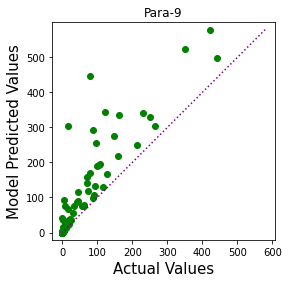

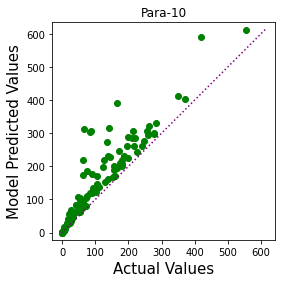

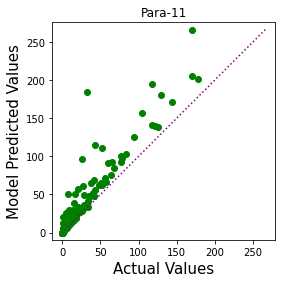

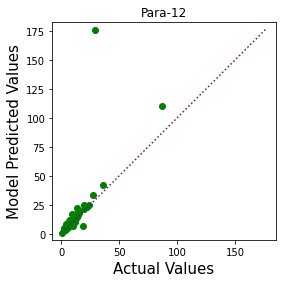

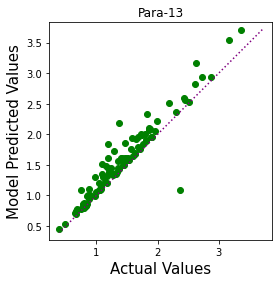

In [86]:
#Scatter plot for all "year = 10" rows for each target column
for i in range(5):
  plt.figure(figsize=(4,4))
  true_value = pred.iloc[:, i]
  predicted_value = df_test.iloc[:, i + 10]
  plt.scatter(true_value, predicted_value, c='green')
  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'purple',linestyle='dotted')
  plt.title(names[i])
  plt.xlabel('Actual Values', fontsize=15)
  plt.ylabel('Model Predicted Values', fontsize=15)
  plt.axis('equal')
  plt.show()